## Preprocessing

In [1]:
!unzip /content/YouTube_DataSet_Annotated.zip -d /content/extracted_files

Archive:  /content/YouTube_DataSet_Annotated.zip
   creating: /content/extracted_files/action_youtube_naudio/
   creating: /content/extracted_files/action_youtube_naudio/basketball/
   creating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_01.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_02.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_03.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_04.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_05.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_06.xgtf  
  inflating: /content/extracted_files/action_youtube_naudio/basketball/Annotation/v_shooting_01_07.

In [2]:
import os
import sys
import csv
import numpy as np
import imageio

def load_groups(input_folder):
    """
    Load the list of sub-folders into a python list with their corresponding label.
    """
    groups = []
    label_folders = os.listdir(input_folder)
    index = 0
    for label_folder in sorted(label_folders):
        label_folder_path = os.path.join(input_folder, label_folder)
        if os.path.isdir(label_folder_path):
            group_folders = os.listdir(label_folder_path)
            for group_folder in group_folders:
                # Skip folder named 'Annotation'
                if group_folder != 'Annotation':
                    groups.append([os.path.join(label_folder_path, group_folder), index])
            index += 1
    return groups

def split_data(groups, file_ext, min_frames, split_ratio):
    """
    Split the data at random for training and test sets.
    :param file_ext: Video file extension (e.g., ".avi")
    :param min_frames: Minimum number of frames required in a video.
    :param split_ratio: Fraction of groups used for training.
    """
    group_count = len(groups)
    indices = np.arange(group_count)
    np.random.seed(0)  # For reproducibility.
    np.random.shuffle(indices)

    train_count = int(split_ratio * group_count)
    test_count = group_count - train_count

    train = []
    test = []

    # Process training groups.
    for i in range(train_count):
        group = groups[indices[i]]
        video_files = os.listdir(group[0])
        for video_file in video_files:
            video_file_path = os.path.join(group[0], video_file)
            if os.path.isfile(video_file_path):
                ext = os.path.splitext(video_file_path)[1]
                if ext.lower() == file_ext.lower():
                    try:
                        video_reader = imageio.get_reader(video_file_path, 'ffmpeg')
                        if len(video_reader) >= min_frames:
                            train.append([os.path.abspath(video_file_path), group[1]])
                    except Exception as e:
                        print(f"Error reading video {video_file_path}: {e}")

    # Process testing groups.
    for i in range(train_count, train_count + test_count):
        group = groups[indices[i]]
        video_files = os.listdir(group[0])
        for video_file in video_files:
            video_file_path = os.path.join(group[0], video_file)
            if os.path.isfile(video_file_path):
                ext = os.path.splitext(video_file_path)[1]
                if ext.lower() == file_ext.lower():
                    try:
                        video_reader = imageio.get_reader(video_file_path, 'ffmpeg')
                        if len(video_reader) >= min_frames:
                            test.append([os.path.abspath(video_file_path), group[1]])
                    except Exception as e:
                        print(f"Error reading video {video_file_path}: {e}")

    return train, test

def write_to_csv(items, file_path):
    """
    Write file paths and their corresponding label to a CSV file.
    """
    with open(file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for item in items:
            writer.writerow(item)

def main(input_folder, output_folder, file_ext=".avi", min_frames=16, split_ratio=0.75):
    """
    Iterates through all the video files in sub-folders of the input folder,
    assigns labels, splits the data into training and test sets, and writes the
    mappings to CSV files.
    """
    groups = load_groups(input_folder)
    print(f"Found {len(groups)} groups in {input_folder}.")

    train, test = split_data(groups, file_ext, min_frames, split_ratio)

    os.makedirs(output_folder, exist_ok=True)
    train_csv = os.path.join(output_folder, 'train_map.csv')
    test_csv = os.path.join(output_folder, 'test_map.csv')

    write_to_csv(train, train_csv)
    write_to_csv(test, test_csv)

    print(f"Training CSV file created: {train_csv}")
    print(f"Testing CSV file created: {test_csv}")
    print("Done!")

# ----- Set your paths here -----
input_folder = "/content/extracted_files/action_youtube_naudio"
output_folder = "/content/extracted_files/output"

# ----- Set any other parameters if needed -----
file_ext = ".avi"         # Change if needed
min_frames = 16           # Minimum frames required per video
split_ratio = 0.75        # Fraction for training set

# ----- Run the main function -----
main(input_folder, output_folder, file_ext, min_frames, split_ratio)


Found 275 groups in /content/extracted_files/action_youtube_naudio.
Training CSV file created: /content/extracted_files/output/train_map.csv
Testing CSV file created: /content/extracted_files/output/test_map.csv
Done!


## Question 1

Extracting training data...
Training samples: (1199, 224, 224, 3)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.1577 - loss: 2.6325 - val_accuracy: 0.5083 - val_loss: 1.6555
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4955 - loss: 1.6058 - val_accuracy: 0.6667 - val_loss: 1.2073
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6422 - loss: 1.1673 - val_accuracy: 0.7333 - val_loss: 1.0094
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7138 - loss: 0.9326 - val_accuracy: 0.8000 - val_loss: 0.7940
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8002 - loss: 0.7249 - val_accuracy: 0.8083 - val_loss: 0.7314
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8321 - loss: 0.5794 - val_accuracy: 0.8083 - val_loss: 0.7350
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8762 - loss: 0.4882 - val_accuracy: 0.8167 - val_loss: 0.6812
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8647 - loss: 0.4834 - val_accuracy: 0.8250 -

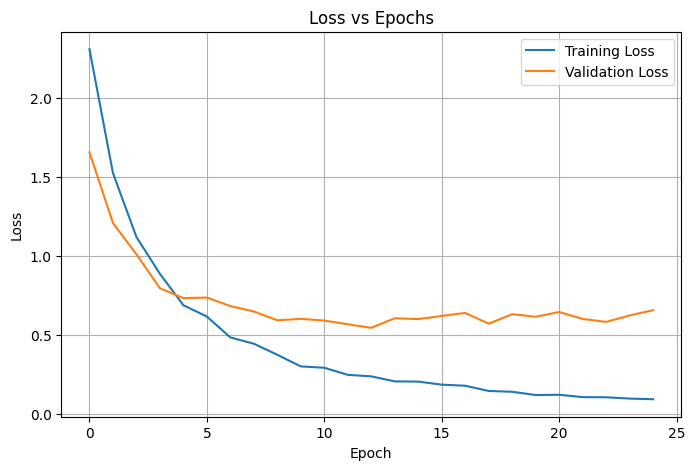

Evaluating on test set...

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        18
           1       0.96      0.95      0.96        58
           2       0.70      0.80      0.74        20
           3       0.81      0.79      0.80        33
           4       0.93      1.00      0.96        40
           5       0.81      0.49      0.61        43
           6       0.79      0.95      0.86        40
           7       1.00      0.81      0.90        59
           8       1.00      0.90      0.95        31
           9       0.83      1.00      0.91        25
          10       0.74      0.68      0.71        34

    accuracy                           0.84       401
   macro avg       0.83      0.85      0.83       401
weighted avg       0.86      0.84      0.84       401

Test Accuracy: 0.8429


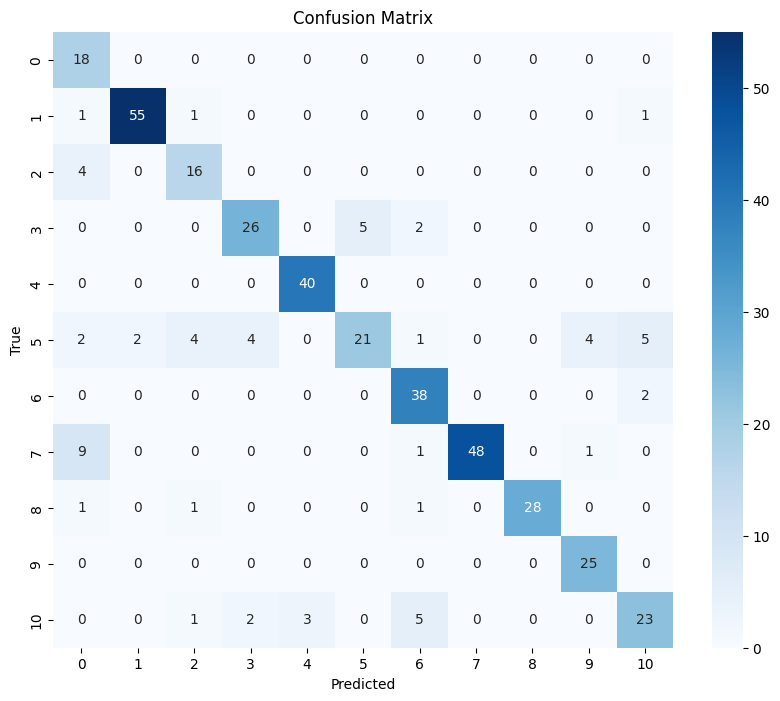

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


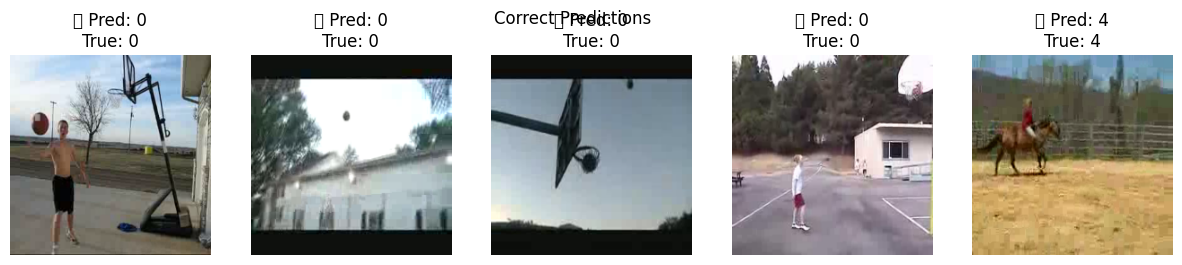

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


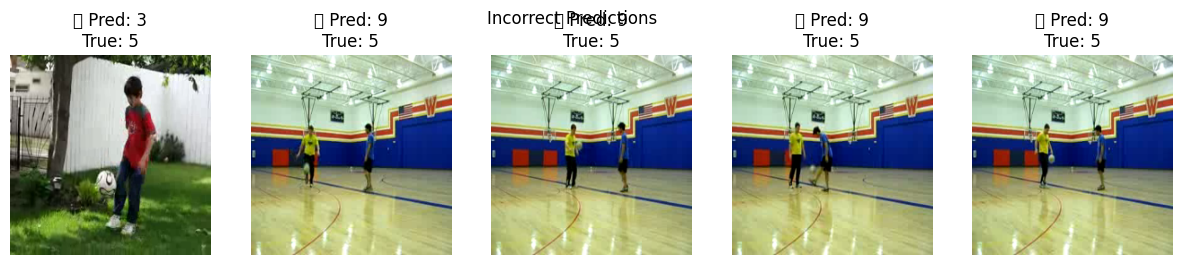

In [5]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam

# Parameters
FRAME_SIZE = (224, 224)
NUM_CLASSES = 11
EPOCHS = 25
BATCH_SIZE = 32
MULTI_FRAME_TESTING = True
FRAMES_PER_TEST_VIDEO = 5

def load_csv(csv_path):
    return pd.read_csv(csv_path, header=None).values.tolist()

def extract_random_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count == 0:
        cap.release()
        return None
    idx = random.randint(0, frame_count - 1)
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ret, frame = cap.read()
    cap.release()
    if ret:
        frame = cv2.resize(frame, FRAME_SIZE)
        return preprocess_input(frame), frame  # also return original frame
    return None, None

def extract_multiple_random_frames(video_path, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count == 0:
        cap.release()
        return []
    indices = sorted(random.sample(range(frame_count), min(num_frames, frame_count)))
    frames = []
    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, FRAME_SIZE)
            frames.append(preprocess_input(frame))
    cap.release()
    return np.array(frames)

def prepare_data(data_list):
    X, y = [], []
    for video_path, label in data_list:
        frame, _ = extract_random_frame(video_path)
        if frame is not None:
            X.append(frame)
            y.append(int(label))
    return np.array(X), to_categorical(y, NUM_CLASSES)

def build_model():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.4),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=3e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load CSVs
train_data = load_csv("/content/extracted_files/output/train_map.csv")
test_data = load_csv("/content/extracted_files/output/test_map.csv")

# Prepare Training Data
print("Extracting training data...")
X_train, y_train = prepare_data(train_data)
print("Training samples:", X_train.shape)

# Build and Train Model
model = build_model()
model.summary()

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.1,
                    shuffle=True)

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Inference on Test Set
print("Evaluating on test set...")
y_true, y_pred = [], []
correct_samples, incorrect_samples = [], []

for video_path, label in test_data:
    true_label = int(label)
    pred_class = None
    original_frame = None

    if MULTI_FRAME_TESTING:
        frames = extract_multiple_random_frames(video_path, num_frames=FRAMES_PER_TEST_VIDEO)
        if len(frames) > 0:
            preds = model.predict(frames, verbose=0)
            avg_pred = np.mean(preds, axis=0)
            pred_class = np.argmax(avg_pred)
    else:
        processed, original = extract_random_frame(video_path)
        if processed is not None:
            pred = model.predict(np.expand_dims(processed, axis=0), verbose=0)
            pred_class = np.argmax(pred)
            original_frame = original

    if pred_class is not None:
        y_pred.append(pred_class)
        y_true.append(true_label)

        if original_frame is None:
            _, original_frame = extract_random_frame(video_path)
        if original_frame is not None:
            rgb_img = cv2.cvtColor(cv2.resize(original_frame, FRAME_SIZE), cv2.COLOR_BGR2RGB)
            if pred_class == true_label and len(correct_samples) < 5:
                correct_samples.append((rgb_img, pred_class, true_label))
            elif pred_class != true_label and len(incorrect_samples) < 5:
                incorrect_samples.append((rgb_img, pred_class, true_label))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(NUM_CLASSES),
            yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Show samples
def display_samples(samples, title):
    if not samples:
        return
    plt.figure(figsize=(15, 3))
    for i, (img, pred, true) in enumerate(samples):
        plt.subplot(1, len(samples), i + 1)
        plt.imshow(img)
        plt.title(f"{'✅' if pred==true else '❌'} Pred: {pred}\nTrue: {true}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

display_samples(correct_samples, "Correct Predictions")
display_samples(incorrect_samples, "Incorrect Predictions")


Multi Frame for Training

Extracting training data (multiple frames per video)...
Training samples: (3595, 224, 224, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 200ms/step - accuracy: 0.1712 - loss: 2.5785 - val_accuracy: 0.5861 - val_loss: 1.5363
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.4952 - loss: 1.5880 - val_accuracy: 0.6889 - val_loss: 1.1481
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6400 - loss: 1.1502 - val_accuracy: 0.7250 - val_loss: 0.9411
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7384 - loss: 0.8941 - val_accuracy: 0.7222 - val_loss: 0.8674
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7853 - loss: 0.7382 - val_accuracy: 0.7333 - val_loss: 0.7742
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8088 - loss: 0.6423 - val_accuracy: 0.7583 - val_loss: 0.7213
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8584 - loss: 0.5277 - val_accuracy: 0.7667 - val_loss: 0.7076
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8662 - loss: 0.4736 - val_a

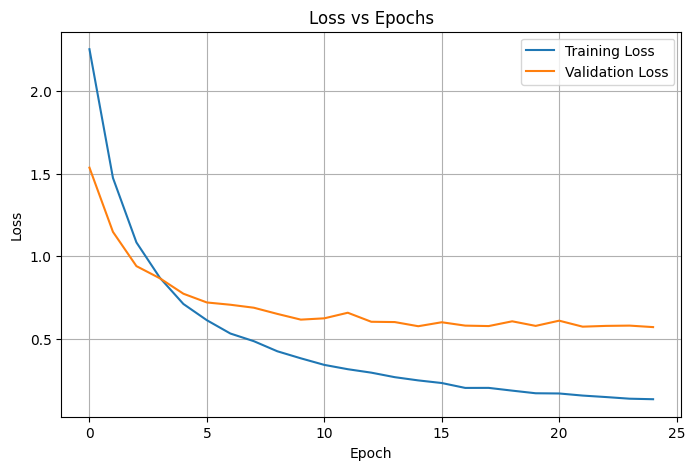

Evaluating on test set...

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.94      0.54        18
           1       0.95      1.00      0.97        58
           2       0.93      0.65      0.76        20
           3       1.00      0.73      0.84        33
           4       0.95      0.97      0.96        40
           5       0.71      0.63      0.67        43
           6       0.93      1.00      0.96        40
           7       1.00      0.66      0.80        59
           8       0.91      0.94      0.92        31
           9       0.83      1.00      0.91        25
          10       0.88      0.88      0.88        34

    accuracy                           0.85       401
   macro avg       0.86      0.85      0.84       401
weighted avg       0.89      0.85      0.86       401

Test Accuracy: 0.8504


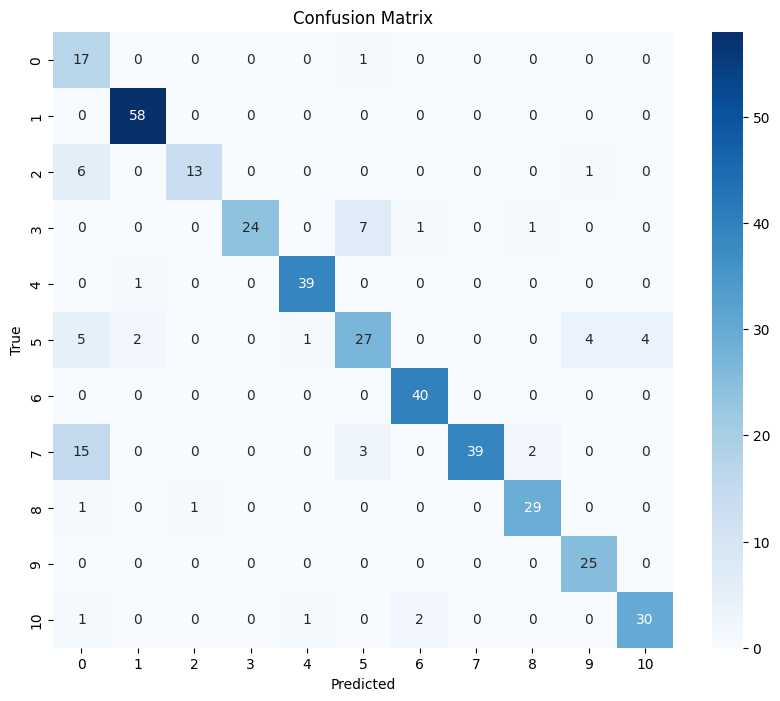

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


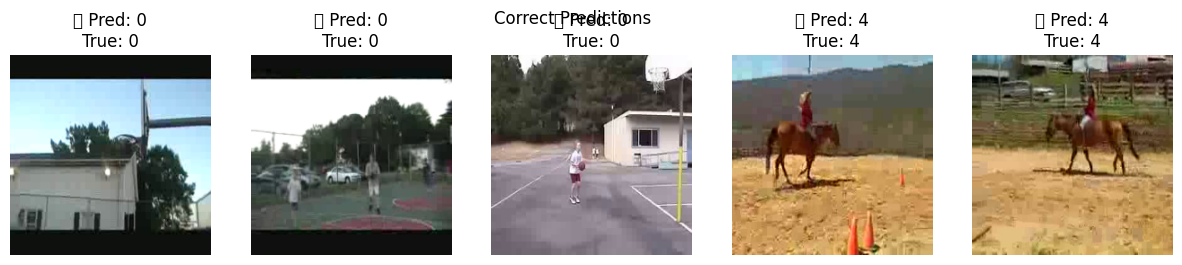

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


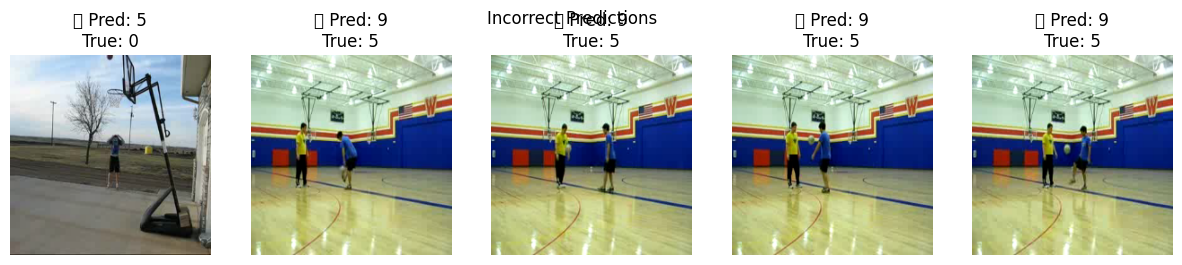

In [3]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam

# Parameters
FRAME_SIZE = (224, 224)
NUM_CLASSES = 11
EPOCHS = 25
BATCH_SIZE = 32
MULTI_FRAME_TESTING = True
FRAMES_PER_TRAIN_VIDEO = 3
FRAMES_PER_TEST_VIDEO = 5

def load_csv(csv_path):
    return pd.read_csv(csv_path, header=None).values.tolist()

def extract_random_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count == 0:
        cap.release()
        return None
    idx = random.randint(0, frame_count - 1)
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ret, frame = cap.read()
    cap.release()
    if ret:
        frame = cv2.resize(frame, FRAME_SIZE)
        return preprocess_input(frame)
    return None

def extract_multiple_random_frames(video_path, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count == 0:
        cap.release()
        return []
    indices = sorted(random.sample(range(frame_count), min(num_frames, frame_count)))
    frames = []
    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, FRAME_SIZE)
            frames.append(preprocess_input(frame))
    cap.release()
    return np.array(frames)

def prepare_data(data_list, num_frames_per_video=3):
    X, y = [], []
    for video_path, label in data_list:
        frames = extract_multiple_random_frames(video_path, num_frames=num_frames_per_video)
        for frame in frames:
            X.append(frame)
            y.append(int(label))
    return np.array(X), to_categorical(y, NUM_CLASSES)

def build_model():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.4),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load data
train_data = load_csv("/content/extracted_files/output/train_map.csv")
test_data = load_csv("/content/extracted_files/output/test_map.csv")

# Prepare training data
print("Extracting training data (multiple frames per video)...")
X_train, y_train = prepare_data(train_data, num_frames_per_video=FRAMES_PER_TRAIN_VIDEO)
print("Training samples:", X_train.shape)

# Build and train model
model = build_model()
model.summary()

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.1,
                    shuffle=True)

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Inference on test set
print("Evaluating on test set...")
y_true, y_pred = [], []
correct_samples = []
incorrect_samples = []

for video_path, label in test_data:R
    true_label = int(label)
    frames = extract_multiple_random_frames(video_path, num_frames=FRAMES_PER_TEST_VIDEO)
    if len(frames) == 0:
        continue
    preds = model.predict(frames, verbose=0)
    avg_pred = np.mean(preds, axis=0)
    pred_class = np.argmax(avg_pred)
    y_true.append(true_label)
    y_pred.append(pred_class)

    # For visualization
    cap = cv2.VideoCapture(video_path)
    ret, vis_frame = cap.read()
    cap.release()
    if ret:
        vis_frame = cv2.cvtColor(cv2.resize(vis_frame, FRAME_SIZE), cv2.COLOR_BGR2RGB)
        if pred_class == true_label and len(correct_samples) < 5:
            correct_samples.append((vis_frame, pred_class, true_label))
        elif pred_class != true_label and len(incorrect_samples) < 5:
            incorrect_samples.append((vis_frame, pred_class, true_label))

# Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(NUM_CLASSES),
            yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization
def show_samples(samples, title, correct=True):
    plt.figure(figsize=(15, 3))
    for i, (img, pred, true) in enumerate(samples):
        plt.subplot(1, len(samples), i + 1)
        plt.imshow(img)
        plt.title(f"{'✅' if correct else '❌'} Pred: {pred}\nTrue: {true}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(correct_samples, "Correct Predictions", correct=True)
show_samples(incorrect_samples, "Incorrect Predictions", correct=False)


Preparing training clips...
Training shape: (3588, 16, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_4 (Conv3D)                    │ (None, 14, 62, 62, 32)      │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 14, 31, 31, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 31, 31, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 12, 29, 29, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 6, 14, 14, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 14, 14, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_6 (Conv3D)                    │ (None, 4, 12, 12, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_7 (Conv3D)                    │ (None, 2, 10, 10, 128)      │         442,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 1, 5, 5, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,495,243 (9.52 MB)

 Trainable params: 2,495,051 (9.52 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.1228 - loss: 2.5989 - val_accuracy: 0.1448 - val_loss: 2.4190
Epoch 2/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.2256 - loss: 2.2621 - val_accuracy: 0.2033 - val_loss: 2.2545
Epoch 3/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3137 - loss: 2.0844 - val_accuracy: 0.2813 - val_loss: 2.2456
Epoch 4/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4133 - loss: 1.8206 - val_accuracy: 0.4123 - val_loss: 2.1453
Epoch 5/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4777 - loss: 1.5760 - val_accuracy: 0.3510 - val_loss: 2.0835
Epoch 6/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5368 - loss: 1.4288 - val_accuracy: 0.4011 - val_loss: 2.1970
Epoch 7/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5948 - loss: 1.2923 - val_accuracy: 0.4123 - val_loss: 2.2688
Epoch 8/20
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6314 -

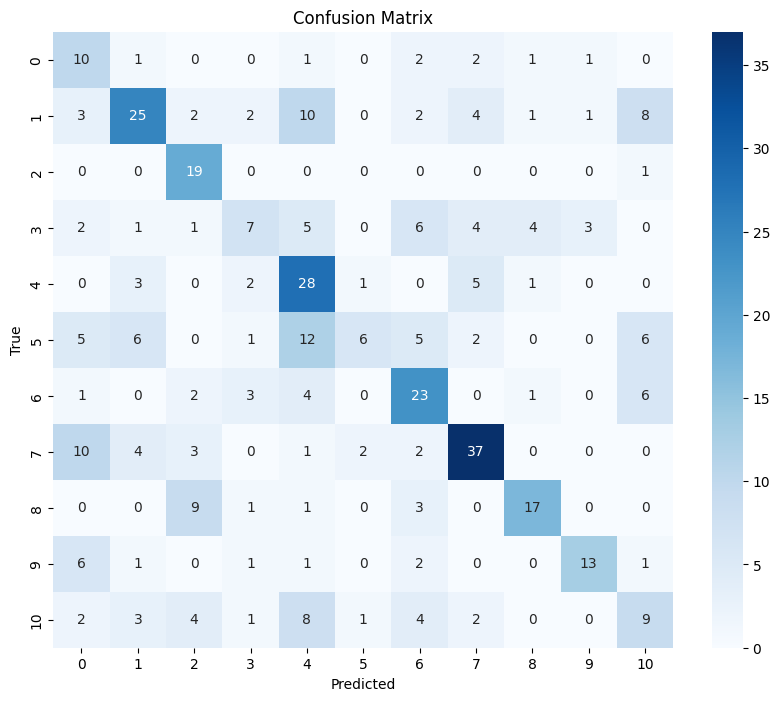

In [2]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
import random
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Parameters
NUM_CLASSES = 11
EPOCHS = 20
BATCH_SIZE = 2
CLIP_LEN = 16
FRAME_SIZE = (64, 64)
CHANNELS = 3
TRAIN_CLIPS_PER_VIDEO = 3
TEST_CLIPS_PER_VIDEO = 5

def load_csv(csv_path):
    return pd.read_csv(csv_path, header=None).values.tolist()

def extract_clip(video_path, clip_len=CLIP_LEN, size=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count < clip_len or frame_count == 0:
        cap.release()
        return None
    start = random.randint(0, frame_count - clip_len)
    clip = []
    for i in range(start, start + clip_len):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            cap.release()
            return None
        frame = cv2.resize(frame, size)
        clip.append(frame)
    cap.release()
    clip = np.array(clip).astype(np.float32) / 255.0
    return clip

def prepare_data(data_list, clips_per_video=1):
    X, y = [], []
    for video_path, label in data_list:
        for _ in range(clips_per_video):
            clip = extract_clip(video_path)
            if clip is not None:
                X.append(clip)
                y.append(int(label))
    X = np.array(X)
    y = to_categorical(y, NUM_CLASSES)
    return X, y

def build_3d_cnn(input_shape=(CLIP_LEN, FRAME_SIZE[0], FRAME_SIZE[1], CHANNELS), num_classes=NUM_CLASSES):
    model = models.Sequential([
        layers.Conv3D(32, kernel_size=(3,3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling3D(pool_size=(1,2,2)),
        layers.BatchNormalization(),

        layers.Conv3D(64, kernel_size=(3,3,3), activation='relu'),
        layers.MaxPooling3D(pool_size=(2,2,2)),
        layers.BatchNormalization(),

        layers.Conv3D(128, kernel_size=(3,3,3), activation='relu'),
        layers.Conv3D(128, kernel_size=(3,3,3), activation='relu'),
        layers.MaxPooling3D(pool_size=(2,2,2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load CSVs
train_data = load_csv("/content/extracted_files/output/train_map.csv")
test_data = load_csv("/content/extracted_files/output/test_map.csv")

# Prepare Training Data
print("Preparing training clips...")
X_train, y_train = prepare_data(train_data, clips_per_video=TRAIN_CLIPS_PER_VIDEO)
print("Training shape:", X_train.shape)

# Build and Train Model
model = build_3d_cnn()
model.summary()

model.fit(X_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.1,
          shuffle=True)

# Inference on Test Set
print("Evaluating on test set...")
y_true, y_pred = [], []

for video_path, label in test_data:
    preds = []
    for _ in range(TEST_CLIPS_PER_VIDEO):
        clip = extract_clip(video_path)
        if clip is not None:
            pred = model.predict(np.expand_dims(clip, axis=0), verbose=0)
            preds.append(pred[0])
    if preds:
        avg_pred = np.mean(preds, axis=0)
        y_pred.append(np.argmax(avg_pred))
        y_true.append(int(label))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


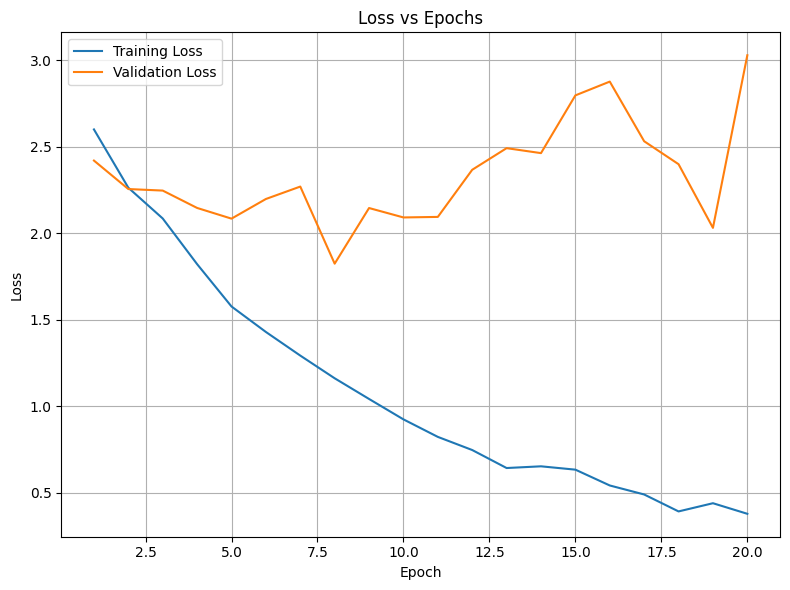